In [1]:
spotify_lst = ['606FB2E4VYYs9CJSLCnhUa', '4Ur5dnjKkGgjPSJpwKBHDd', 
               '5zP5a7VWRgvjCi6ra3IeJ0', '7CIeE38SdXZ9J0M76QRhmS',
               '0H3MpEFBNTXwPzPqz8yj6V', '69dtPFfkYa5URry1zo665z',
               '5ows8MyC8CN95GTbgTovnd', '6q6DzFMMwpYeU2a90J5IyJ',
               '3DyizJDVdHipO17XqQeK5f', '4J4rsjuzvXNcF996nPP2pG',
               '7MMIVoteyDNzNp7PJUCeG4', '6BGXLlqwvOkM4JdWXxjmER',
               '6EaLmdD8KZvXiBER0VgY8L', '1bk6tO6d5oes6n0vhACi5x',
               '74BP9iaXq354DmPUepjzNC', '1ux0KmjmnQCNQzQ0BH7kbl',
               '3lluUY967E5z4WnNeJKDV2', '2FEAysct4thAiYGojrHKlM',
               '3fniVM8pbMq8jcR23aVIY8', '6D0WkFzwCx5pxfD5jX0wkL',
               '6taan6n01bwB2B7EtN9KYI', '2mI2QBJDL4klpigMkqaFs5',
               '61FusglQju0yXpz3v7nYd5', '0p6VwHqAZNV9xw5HuIKHJd',
               '35wZqszdyXNFCAztyLWlgT', '7A1EbS3Zux6zhXyeSpHEx9',
               '5zYgmmRp9ozLstVry1JLbw', '0YKbjLgCPsp7K3k2JH4NZw',
               '6NewzRggzRDBBPowRuXBor', '0ytSNwG5nGYtB01bnmy4CY',
               '7gTvhRcUZaXt8ydN3AAIqF', '6sBduygGNeCecOenI9ZZ2F',
               '0vqKnSeWspiQ9EHhWM8ZFD', '6B7HuyxqWvbBkFMErD64VC',
               '2nAvu6nKy5YMZnjJjAA5et', '1FtOhbe9MmxVq3yhU9AYzP',
               '71ok4KKSKzVKTudbTsyLFS', '2wkM6gBP77AQB4hFwutvy4',
               '5DxEF8AgbkfjixhPVzRTqA', '4Qk6DsuSEp34mm8K7MuXH9',
               '1uFaOr8h7OeCG1atiUGaVN', '7iUo5BVXvkRKzzlX0ozIdA',
               '6qsTClrBMf59rUNnD3fzWc', '2Inm8T8QcA90nbOGshxHLo',
               '6AihpQrTXtgDnkcQwLfxYb', '5ohzMZ3OBvDlHypXCBKrHa',
               '3XdhaqlOYFr5484hWYHmTB', '5cIzPoYKkD0HtGKZ0ZDWMx',
               '1WvCS1o0lfs66CSxo4Ex49', '4bSNhfnKA9mr3ARsMpnau0']

In [2]:
import pandas as pd
import requests
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.oauth2 as oauth2
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
import math

In [3]:
def get_auth():
    CLIENT_ID ='50b2240e93784d028ba2eb626095dd6c'
    CLIENT_SECRET = '07e055a4f4fe4b9d83ad3e6961bb40f2'

    credentials = oauth2.SpotifyClientCredentials(
            client_id=CLIENT_ID,
            client_secret=CLIENT_SECRET)

    token = credentials.get_access_token()
    return "Bearer " + token


In [4]:
get_auth()

'Bearer BQC5bYuZvJA4rCN35JpfAZvl9c5PiY3-WBcsKPAdfpXi-qmaH1y0j0n3HUut2Utd74d_fR0E0cKB0uMyKuQ'

In [5]:
def get_tracks(lst = spotify_lst):
    x= 1969
    df_list=[]
    for playlist in lst:
    

        r = requests.get(
        f"https://api.spotify.com/v1/playlists/{playlist}/tracks",
        headers={ "Accept": "application/json", "Content-Type": "application/json", "Authorization": get_auth()})
        dat =r.json()
        
        data = dat['items']
        tracks_list=[]

        for i in range(0,len(data)):
           
            tracks_list.append({"track_name" : data[i]['track']['name'], "artist" : data[i]['track']['artists'][0]['name'],
                "album" : data[i]['track']['album']['name'], "release_date" : data[i]['track']['album']['release_date'],  
                "year" : x, "explicit" : data[i]['track']['explicit'], 
                "artist_id" : data[i]['track']['artists'][0]['id'], "album_id" : data[i]['track']['album']['id'], 
                "track_id" : data[i]['track']['id']})
        
        df_list.append(pd.DataFrame(tracks_list))
        
        x += 1
        
    tracks_df = pd.concat(df_list)
    tracks_df = tracks_df.reset_index()
    tracks_df.drop('index', axis = 1, inplace=True)
    return tracks_df
tracks_df = get_tracks()

In [7]:
def get_missing_tracks(df = tracks_df):
    null_df =df[df.track_id.isnull()]
    null_track_info = []
    count = 0
    for row in null_df.itertuples():
        track = getattr(row, 'track_name').replace(" ", "%20")
        artist = getattr(row, 'artist').replace(" ", "%20")
        
        
        q = requests.get(
            f"https://api.spotify.com/v1/search?q=track:{track}%20artist:{artist}&type=track" ,
            headers={ "Accept": "application/json", "Content-Type": "application/json", "Authorization": get_auth()},
            params= {'limit':1})
        try:
            null_track = q.json()
            
            null_track_info.append({'release_date': null_track['tracks']['items'][0]['album']['release_date'], 
                'explicit': null_track['tracks']['items'][0]['explicit'],
                'artist_id': null_track['tracks']['items'][0]['artists'][0]['id'],
                'album_id': null_track['tracks']['items'][0]['album']['id'],
                'track_id': null_track['tracks']['items'][0]['id']})
        except(IndexError):
             null_track_info.append({'release_date': np.nan, 
                'explicit': np.nan,
                'artist_id': np.nan ,
                'album_id': np.nan,
                'track_id': np.nan })
             
        count +=1
    null_track_info_df = pd.DataFrame(null_track_info, index=null_df.index)
    null_df.fillna(null_track_info_df, inplace=True)
    return df.fillna(null_df, inplace = True)
get_missing_tracks()

Stick-Up
Never%20Ending%20Song%20Of%20Love
She's%20Not%20Just%20Another%20Woman
I've%20Found%20Someone%20Of%20My%20Own
Daisy%20A%20Day
Jambalaya%20(On%20the%20Bayou)
Dre%20Day
O%20o%20h%20Child
Nothin%20My%20Love%20Cant%20Fix
Gettin'%20Jiggy%20Wit%20It
Semi-Charmed%20Life
Get%20Over%20Yourself
Superwoman%20Pt.%20II%20(feat%20Fabolous)


In [8]:
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4728 entries, 0 to 4727
Data columns (total 9 columns):
track_name      4728 non-null object
artist          4728 non-null object
album           4728 non-null object
release_date    4715 non-null object
year            4728 non-null int64
explicit        4728 non-null bool
artist_id       4715 non-null object
album_id        4715 non-null object
track_id        4715 non-null object
dtypes: bool(1), int64(1), object(7)
memory usage: 300.2+ KB


In [9]:
def get_track_info(df = tracks_df):
    track_info=[]
    for row in df.itertuples():
        track_id = getattr(row, 'track_id')
        
        q = requests.get(
            f"https://api.spotify.com/v1/audio-features/{track_id}" ,
            headers={ "Accept": "application/json", "Content-Type": "application/json", "Authorization": get_auth()})
        track_features = q.json()
        try:
            track_info.append({'danceability': track_features['danceability'], 'energy': track_features['energy'],
                           'key': track_features['key'], 'loudness': track_features['loudness'], 
                           'mode': track_features['mode'], 'speechiness': track_features['speechiness'],
                           'acousticness': track_features['acousticness'], 
                           'instrumentalness': track_features['instrumentalness'], 'liveness': track_features['liveness'],
                           'valence': track_features['valence'], 'tempo': track_features['tempo'], 
                           'duration_ms': track_features['duration_ms'], 'time_signature': track_features['time_signature']})
        except(KeyError):
            track_info.append({'danceability': np.nan, 'energy': np.nan, 'key': np.nan, 'loudness': np.nan, 'mode': np.nan, 
                               'speechiness': np.nan, 'acousticness': np.nan, 'instrumentalness': np.nan, 'liveness': np.nan,
                               'valence': np.nan, 'tempo': np.nan, 'duration_ms': np.nan, 'time_signature': np.nan})
    
    track_info_df = pd.DataFrame(track_info)
    df= df.join(track_info_df)

    return df

get_track_info()

SSLError: HTTPSConnectionPool(host='accounts.spotify.com', port=443): Max retries exceeded with url: /api/token (Caused by SSLError(SSLError("bad handshake: SysCallError(-1, 'Unexpected EOF')")))

In [7]:
tracks_df.head(3)


,Unnamed: 0,track_name,artist,album,release_date,year,explicit,artist_id,album_id,track_id,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,"Sugar, Sugar",The Archies,"Sugar, Sugar",2007-01-01,1969,False,33QmoCkSqADuQEtMCysYLh,1tjurhbCd70ZjsXhN8fGUC,4GAI8BxeMgrvhZNEU59UfR,...,-10.264,1.0,0.0299,0.757,0.000003,0.0972,0.970,122.771,169627.0,4.0
1,1,Aquarius / Let the Sunshine In (The Flesh Fail...,The 5th Dimension,The Age Of Aquarius,2000-03-23,1969,False,1UUYAQ9LiRsZF0ZukQNWXM,1kVipwgtVNAaHM7Py341Ch,0HZlND4giwzgolBpaNIRGV,...,-6.098,1.0,0.0399,0.446,0.001510,0.0998,0.516,118.230,289293.0,4.0
2,2,Honky Tonk Women - Mono Version,The Rolling Stones,Hot Rocks (1964-1971),1971-12-20,1969,False,22bE4uQ6baNwSHPVcDxLCe,0aqZJlugIkTUWW1sa4BANp,3RZMzCvYsmJ0u2ioKTOsmJ,...,-6.613,1.0,0.0606,0.381,0.030000,0.1680,0.966,119.544,179387.0,4.0


In [30]:
tracks_df.dropna(inplace = True)


In [11]:
# tracks_csv = tracks_df.to_csv('tracks_csv.csv')

In [12]:
tracks_df = pd.read_csv('tracks_csv.csv')

In [16]:
tracks_df.head()

,Unnamed: 0,Unnamed: 0.1,track_name,artist,album,release_date,year,explicit,artist_id,album_id,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,0,"Sugar, Sugar",The Archies,"Sugar, Sugar",2007-01-01,1969,False,33QmoCkSqADuQEtMCysYLh,1tjurhbCd70ZjsXhN8fGUC,...,-10.264,1.0,0.0299,0.7570,0.000003,0.0972,0.970,122.771,169627.0,4.0
1,1,1,Aquarius / Let the Sunshine In (The Flesh Fail...,The 5th Dimension,The Age Of Aquarius,2000-03-23,1969,False,1UUYAQ9LiRsZF0ZukQNWXM,1kVipwgtVNAaHM7Py341Ch,...,-6.098,1.0,0.0399,0.4460,0.001510,0.0998,0.516,118.230,289293.0,4.0
2,2,2,Honky Tonk Women - Mono Version,The Rolling Stones,Hot Rocks (1964-1971),1971-12-20,1969,False,22bE4uQ6baNwSHPVcDxLCe,0aqZJlugIkTUWW1sa4BANp,...,-6.613,1.0,0.0606,0.3810,0.030000,0.1680,0.966,119.544,179387.0,4.0
3,3,3,Come Together,The Beatles,Abbey Road,1969-09-26,1969,False,3WrFJ7ztbogyGnTHbHJFl2,0ETFjACtuP2ADo6LFhL6HN,...,-11.913,0.0,0.0393,0.0302,0.248000,0.0926,0.187,165.007,259947.0,4.0
4,4,4,Everyday People - Single Version,Sly & The Family Stone,Stand,1969-05-03,1969,False,5m8H6zSadhu1j9Yi04VLqD,7iwS1r6JHYJe9xpPjzmWqD,...,-10.656,1.0,0.0297,0.3060,0.032300,0.0430,0.765,114.523,141507.0,4.0


(array([  28.,  103.,  221.,  403.,  691.,  931., 1114.,  767.,  362.,
          95.]),
 array([0.149 , 0.2327, 0.3164, 0.4001, 0.4838, 0.5675, 0.6512, 0.7349,
        0.8186, 0.9023, 0.986 ]),
 <a list of 10 Patch objects>)

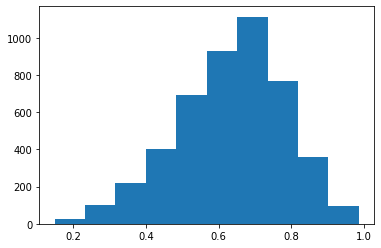

In [13]:
plt.hist(tracks_df['danceability'])

(array([ 11.,  64., 163., 355., 596., 731., 871., 837., 769., 318.]),
 array([0.0204 , 0.11806, 0.21572, 0.31338, 0.41104, 0.5087 , 0.60636,
        0.70402, 0.80168, 0.89934, 0.997  ]),
 <a list of 10 Patch objects>)

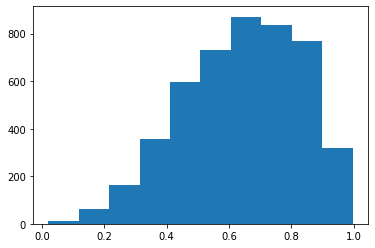

In [14]:
plt.hist(tracks_df['energy'])



In [15]:
tracks_groupd_by_year_mean = tracks_df.groupby('year').mean()

In [18]:
tracks_groupd_by_year_mean.head()

,Unnamed: 0,Unnamed: 0.1,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
year,,,,,,,,,,,,,,,,
1969,49.5,49.500000,0.0,0.536120,0.462129,5.170000,-11.640100,0.810000,0.047170,0.387787,0.032163,0.202622,0.595190,117.611130,194248.520000,3.910000
1970,149.5,149.500000,0.0,0.559780,0.601260,5.140000,-10.172190,0.840000,0.049502,0.313142,0.037285,0.193160,0.675520,119.942320,200823.840000,3.960000
1971,247.5,249.770833,0.0,0.570667,0.547966,4.604167,-10.708917,0.729167,0.050941,0.415658,0.022772,0.193549,0.683438,113.191031,206075.250000,3.968750
1972,345.5,349.500000,0.0,0.576670,0.547614,5.250000,-10.677650,0.750000,0.058205,0.404690,0.040947,0.195288,0.655470,122.068070,210260.560000,3.940000
1973,444.5,450.255102,0.0,0.572122,0.556796,5.193878,-10.576571,0.663265,0.059070,0.346678,0.053900,0.158622,0.686991,124.273724,231690.795918,3.908163


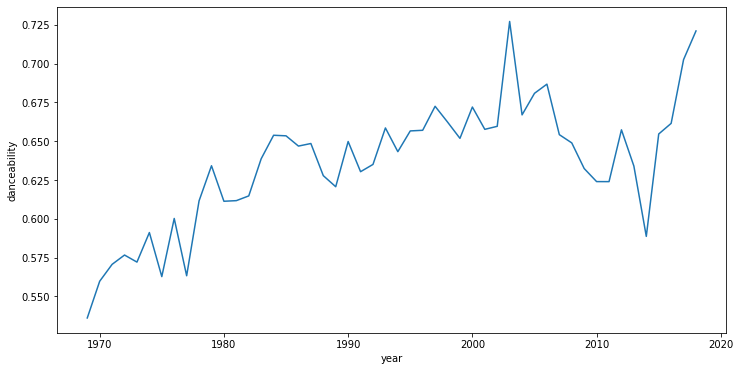

In [17]:
import seaborn as sns
plt.figure(figsize = (12,6))
f = sns.lineplot(tracks_groupd_by_year_mean.index, tracks_groupd_by_year_mean['danceability'])


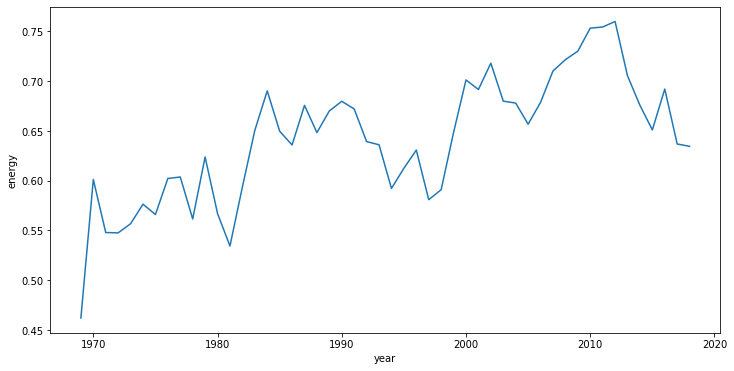

In [18]:
plt.figure(figsize = (12,6))
g = sns.lineplot(tracks_groupd_by_year_mean.index, tracks_groupd_by_year_mean['energy'])

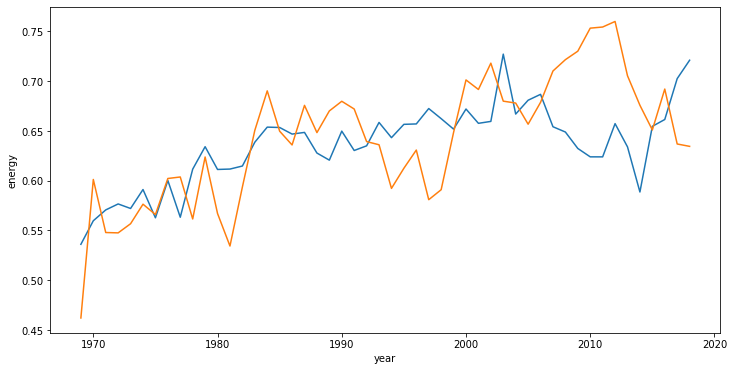

In [19]:
plt.figure(figsize = (12,6))
ax = sns.lineplot(tracks_groupd_by_year_mean.index, tracks_groupd_by_year_mean['danceability'])
ax2 = sns.lineplot(tracks_groupd_by_year_mean.index, tracks_groupd_by_year_mean['energy'])

[Text(0, 0, '1969'),
 Text(0, 0, '1970'),
 Text(0, 0, '1971'),
 Text(0, 0, '1972'),
 Text(0, 0, '1973'),
 Text(0, 0, '1974'),
 Text(0, 0, '1975'),
 Text(0, 0, '1976'),
 Text(0, 0, '1977'),
 Text(0, 0, '1978'),
 Text(0, 0, '1979'),
 Text(0, 0, '1980'),
 Text(0, 0, '1981'),
 Text(0, 0, '1982'),
 Text(0, 0, '1983'),
 Text(0, 0, '1984'),
 Text(0, 0, '1985'),
 Text(0, 0, '1986'),
 Text(0, 0, '1987'),
 Text(0, 0, '1988'),
 Text(0, 0, '1989'),
 Text(0, 0, '1990'),
 Text(0, 0, '1991'),
 Text(0, 0, '1992'),
 Text(0, 0, '1993'),
 Text(0, 0, '1994'),
 Text(0, 0, '1995'),
 Text(0, 0, '1996'),
 Text(0, 0, '1997'),
 Text(0, 0, '1998'),
 Text(0, 0, '1999'),
 Text(0, 0, '2000'),
 Text(0, 0, '2001'),
 Text(0, 0, '2002'),
 Text(0, 0, '2003'),
 Text(0, 0, '2004'),
 Text(0, 0, '2005'),
 Text(0, 0, '2006'),
 Text(0, 0, '2007'),
 Text(0, 0, '2008'),
 Text(0, 0, '2009'),
 Text(0, 0, '2010'),
 Text(0, 0, '2011'),
 Text(0, 0, '2012'),
 Text(0, 0, '2013'),
 Text(0, 0, '2014'),
 Text(0, 0, '2015'),
 Text(0, 0, '

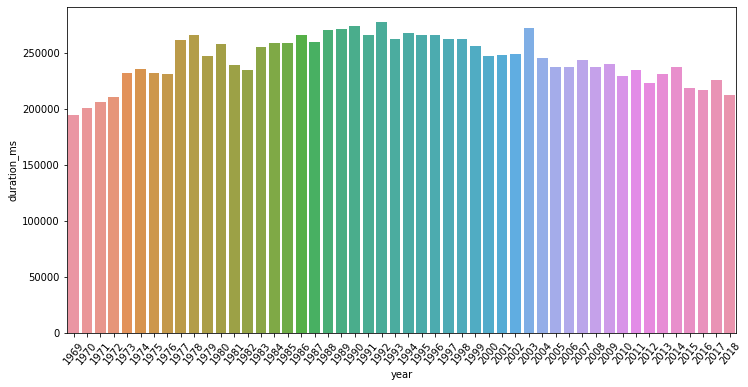

In [22]:
plt.figure(figsize = (12,6))
g = sns.barplot(tracks_groupd_by_year_mean.index, tracks_groupd_by_year_mean['duration_ms'])
g.set_xticklabels(g.get_xticklabels(), rotation=50)



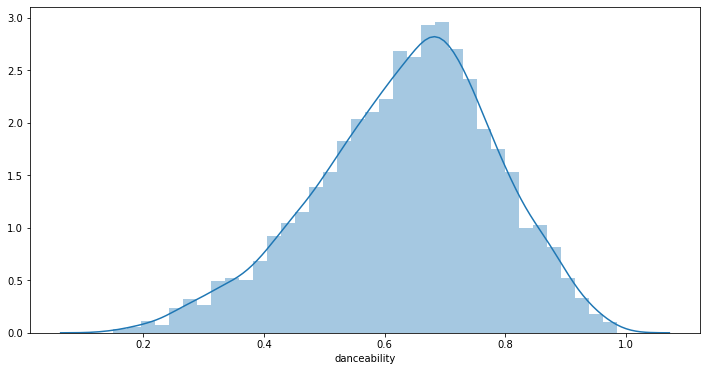

In [20]:
plt.figure(figsize = (12,6))
g = sns.distplot(tracks_df['danceability'])


In [22]:
worldbank = pd.read_csv('worldbank_data.csv')

In [23]:
worldbank.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 54 columns):
Series Name      6 non-null object
Series Code      4 non-null object
Country Name     4 non-null object
Country Code     4 non-null object
1970 [YR1970]    4 non-null object
1971 [YR1971]    4 non-null object
1972 [YR1972]    4 non-null object
1973 [YR1973]    4 non-null object
1974 [YR1974]    4 non-null object
1975 [YR1975]    4 non-null object
1976 [YR1976]    4 non-null object
1977 [YR1977]    4 non-null object
1978 [YR1978]    4 non-null object
1979 [YR1979]    4 non-null object
1980 [YR1980]    4 non-null object
1981 [YR1981]    4 non-null object
1982 [YR1982]    4 non-null object
1983 [YR1983]    4 non-null object
1984 [YR1984]    4 non-null object
1985 [YR1985]    4 non-null object
1986 [YR1986]    4 non-null object
1987 [YR1987]    4 non-null object
1988 [YR1988]    4 non-null object
1989 [YR1989]    4 non-null object
1990 [YR1990]    4 non-null float64
1991 [YR1991]    4 non-

In [24]:
worldbank = worldbank.transpose()

In [25]:
worldbank = worldbank.iloc[4:,0:3]

In [26]:
worldbank

,0,1,2
1970 [YR1970],23207.2199359187,-0.254079592763361,-1.40937952140189
1971 [YR1971],23670.3457327086,3.29336237989513,1.99561084037087
1972 [YR1972],24649.8447359645,5.2588953573494,4.13808490301166
1973 [YR1973],25794.1281658637,5.64571947000461,4.64215268759745
1974 [YR1974],25421.3696704294,-0.540546528852801,-1.44512926755014
1975 [YR1975],25120.2308496895,-0.205464013975075,-1.18458928312624
1976 [YR1976],26223.3764450662,5.38813922864261,4.39146280930871
1977 [YR1977],27161.4266860093,4.62415920523873,3.57715278544775
1978 [YR1978],28362.7717986387,5.53530269342748,4.42298236582779
1979 [YR1979],28939.639937793,3.16615027139846,2.03389197378074


In [27]:
worldbank.rename(columns = {0 : 'gdp_pc', 1: 'gdp_growth', 2:'gdp_growth_pc'}, inplace =True)

In [28]:
worldbank.head()

,gdp_pc,gdp_growth,gdp_growth_pc
1970 [YR1970],23207.2199359187,-0.254079592763361,-1.40937952140189
1971 [YR1971],23670.3457327086,3.29336237989513,1.99561084037087
1972 [YR1972],24649.8447359645,5.2588953573494,4.13808490301166
1973 [YR1973],25794.1281658637,5.64571947000461,4.64215268759745
1974 [YR1974],25421.3696704294,-0.540546528852801,-1.44512926755014


In [29]:
worldbank['year'] = [x for x in range(1970, 2020)]

In [30]:
worldbank.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 1970 [YR1970] to 2019 [YR2019]
Data columns (total 4 columns):
gdp_pc           50 non-null object
gdp_growth       50 non-null object
gdp_growth_pc    50 non-null object
year             50 non-null int64
dtypes: int64(1), object(3)
memory usage: 2.0+ KB


In [31]:
worldbank['gdp_growth'] = worldbank['gdp_growth'].apply(pd.to_numeric, errors = 'coerce')

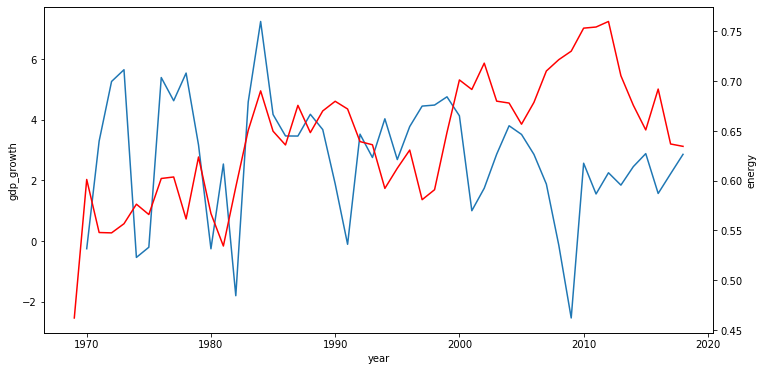

In [32]:
plt.figure(figsize = (12,6))
ax = sns.lineplot(worldbank['year'], worldbank['gdp_growth'])
ax2 = ax.twinx()
ax2 = sns.lineplot(tracks_groupd_by_year_mean.index, tracks_groupd_by_year_mean['energy'], color = 'red')

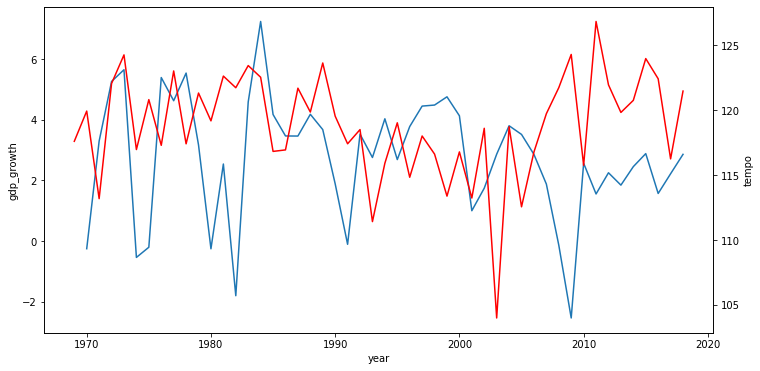

In [33]:
plt.figure(figsize = (12,6))
ax = sns.lineplot(worldbank['year'], worldbank['gdp_growth'])
ax2 = ax.twinx()
ax2 = sns.lineplot(tracks_groupd_by_year_mean.index, tracks_groupd_by_year_mean['tempo'], color = 'red')

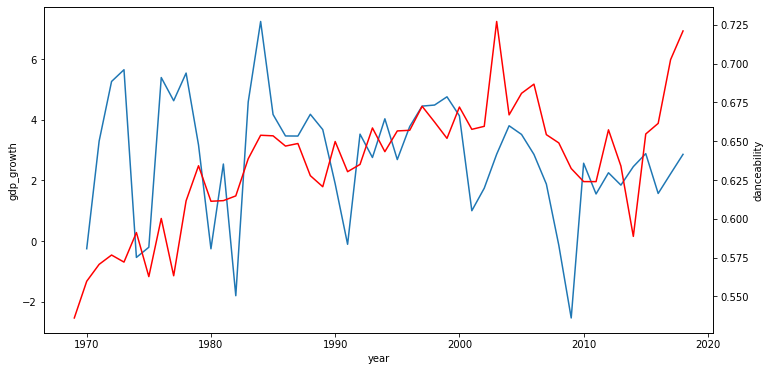

In [34]:

plt.figure(figsize = (12,6))
ax = sns.lineplot(worldbank['year'], worldbank['gdp_growth'])
ax2 = ax.twinx()
ax2 = sns.lineplot(tracks_groupd_by_year_mean.index, tracks_groupd_by_year_mean['danceability'], color = 'red')

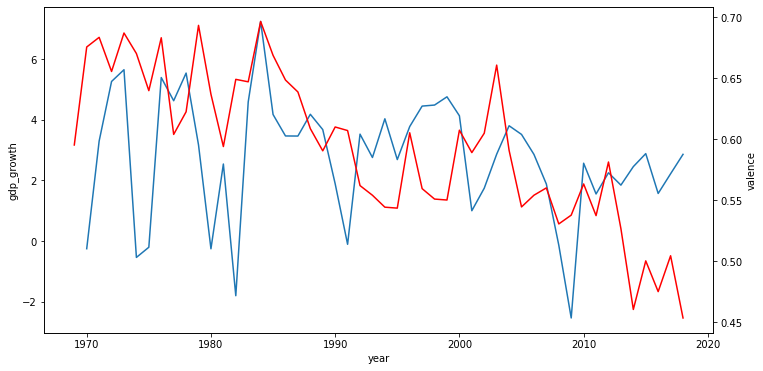

In [35]:

plt.figure(figsize = (12,6))
ax = sns.lineplot(worldbank['year'], worldbank['gdp_growth'])
ax2 = ax.twinx()
ax2 = sns.lineplot(tracks_groupd_by_year_mean.index, tracks_groupd_by_year_mean['valence'], color = 'red')

In [36]:
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4715 entries, 0 to 4714
Data columns (total 24 columns):
Unnamed: 0          4715 non-null int64
Unnamed: 0.1        4715 non-null int64
track_name          4715 non-null object
artist              4715 non-null object
album               4715 non-null object
release_date        4715 non-null object
year                4715 non-null int64
explicit            4715 non-null bool
artist_id           4715 non-null object
album_id            4715 non-null object
track_id            4715 non-null object
danceability        4715 non-null float64
energy              4715 non-null float64
key                 4715 non-null float64
loudness            4715 non-null float64
mode                4715 non-null float64
speechiness         4715 non-null float64
acousticness        4715 non-null float64
instrumentalness    4715 non-null float64
liveness            4715 non-null float64
valence             4715 non-null float64
tempo               4715 no

In [37]:
pop_sample.head()

NameError: name 'pop_sample' is not defined

# Test 1

## Energy

In [43]:
def get_sample(data, n):
    sample = []
    while len(sample) != n:
        x = np.random.choice(data)
        sample.append(x)
    
    return sample

In [44]:
def get_sample_mean(sample):
    return sum(sample) / len(sample)

In [45]:
def create_sample_distribution(data, dist_size=1000, n=1000):
    sample_dist = []
    while len(sample_dist) != dist_size:
        sample = get_sample(data, n)
        sample_mean = get_sample_mean(sample)
        sample_dist.append(sample_mean)
    
    return sample_dist

In [46]:
tracks2009=tracks_df[tracks_df['year']==2009]

sample_2009 = create_sample_distribution(tracks2009['energy'], dist_size=100, n=40)

In [47]:
stats.normaltest(sample_2009)

NormaltestResult(statistic=1.7679553873521807, pvalue=0.4131363093277711)

In [48]:
sample_population = create_sample_distribution(tracks_df['energy'], dist_size=100, n=40)
stats.normaltest(sample_population)

NormaltestResult(statistic=3.559458224715488, pvalue=0.16868383544660545)

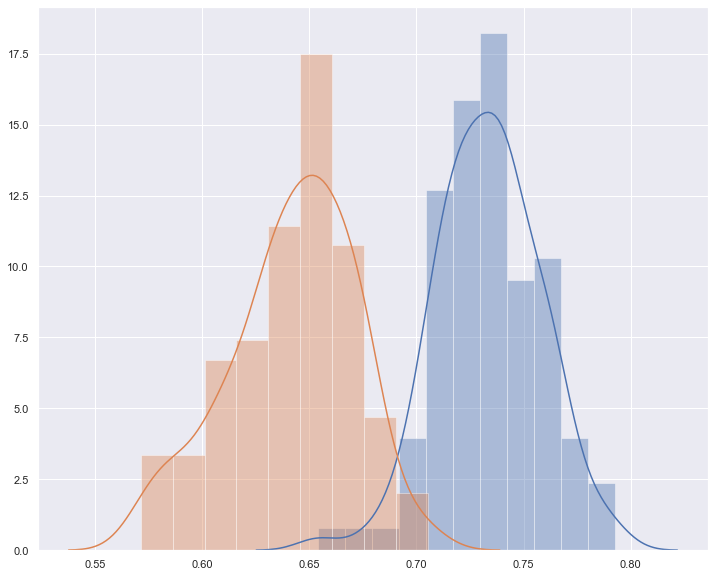

In [49]:
sns.distplot(sample_2009)
sns.distplot(sample_population)

In [ ]:
tracks2008=tracks_df[tracks_df['year']==2009]

sample = tracks2008['energy'].sample(n=40, random_state=3)
pop_sample = tracks_df.sample(n=40, random_state=1)

# Population mean (μ)
mu = pop_sample['energy'].mean()
print(mu)

# Sample mean (x̄) using NumPy mean()
x_bar = sample.mean()

# Sample Stadrad Deviation (sigma) using Numpy
sigma = np.std(sample,ddof=1)

# Sample size (n)
n = len(sample)

# Degrees of Freedom
df = n-1

# Difference in sample mean 
diff = x_bar - mu


# Print the findings
print ('The sample contains', n, 'observations, having a mean of', x_bar, "and a standard deviation (sigma) = ", sigma, 
       ", with", df, 'degrees of freedom. The difference between sample and population means is:', diff)


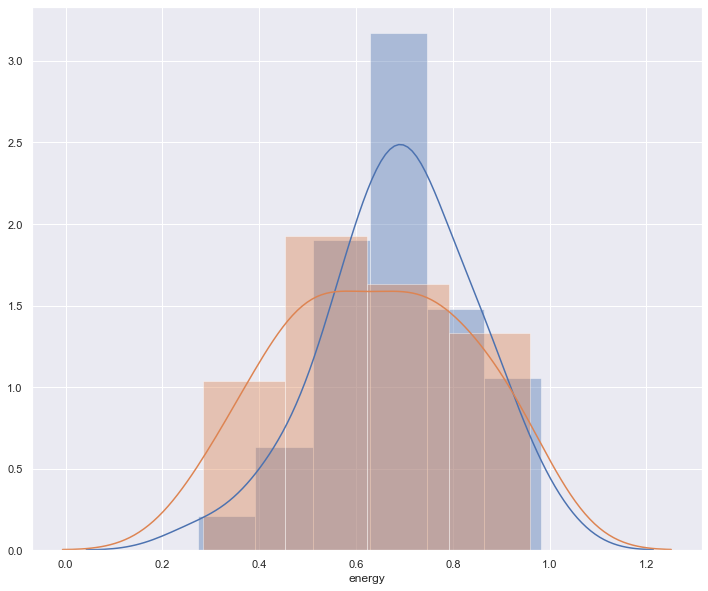

In [39]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
ax = sns.distplot(sample)
ax2 = sns.distplot(pop_sample['energy'])

In [40]:
# Calculate Sigma
t = (x_bar -  mu)/(sigma/np.sqrt(n))
t

2.0774393003962586

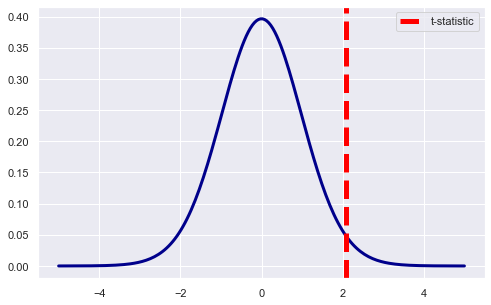

In [41]:
### generate points on the x axis between -5 and 5:
xs = np.linspace(-5, 5, 200)

# use stats.t.pdf to get values on the probability density function for the t-distribution
# the second argument is the degrees of freedom
ys = stats.t.pdf(xs, df, 0, 1)

# initialize a matplotlib "figure"
fig = plt.figure(figsize=(8,5))

# get the current "axis" out of the figure
ax = fig.gca()

# plot the lines using matplotlib's plot function:
ax.plot(xs, ys, linewidth=3, color='darkblue')

# plot a vertical line for our measured difference in rates t-statistic
ax.axvline(t, color='red', linestyle='--', lw=5,label='t-statistic')
ax.legend()
plt.show()

In [42]:
# Calculate critical t-value
t_crit = np.round(stats.t.ppf(1 - 0.05, df=39),3)
t_crit

1.685

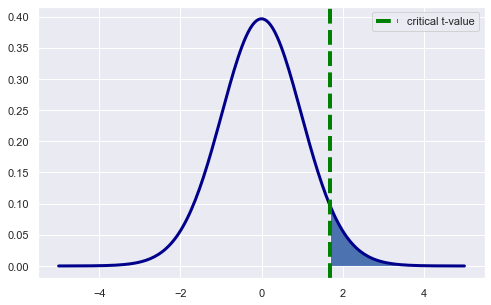

In [149]:
xs = np.linspace(-5, 5, 200)

# use stats.t.pdf to get values on the probability density function for the t-distribution
# the second argument is the degrees of freedom
ys = stats.t.pdf(xs, df, 0, 1)

# initialize a matplotlib "figure"
fig = plt.figure(figsize=(8,5))

# get the current "axis" out of the figure
ax = fig.gca()

# plot the lines using matplotlib's plot function:
ax.plot(xs, ys, linewidth=3, color='darkblue')


ax.axvline(t_crit,color='green',linestyle='--',lw=4,label='critical t-value')
ax.legend()
ax.fill_betweenx(ys,xs,t_crit,where= xs > t_crit)
plt.show()

In [150]:
results = stats.ttest_1samp(a= sample, popmean= mu)         
print ("The t-value for sample is", round(results[0], 2), "and the p-value is", np.round((results[1]), 4))

The t-value for sample is 2.08 and the p-value is 0.0444


In [151]:
if (results[0]>t_crit) and (results[1]<0.05):
    print ("Null hypothesis rejected. Results are statistically significant with t-value =", 
           round(results[0], 2), "and p-value =", np.round((results[1]), 4))
else:
    print ("Null hypothesis is Accepted")

Null hypothesis rejected. Results are statistically significant with t-value = 2.08 and p-value = 0.0444


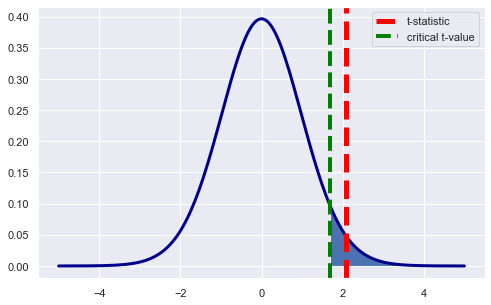

In [152]:
xs = np.linspace(-5, 5, 200)

# use stats.t.pdf to get values on the probability density function for the t-distribution
# the second argument is the degrees of freedom
ys = stats.t.pdf(xs, df, 0, 1)

# initialize a matplotlib "figure"
fig = plt.figure(figsize=(8,5))

# get the current "axis" out of the figure
ax = fig.gca()

# plot the lines using matplotlib's plot function:
ax.plot(xs, ys, linewidth=3, color='darkblue')

# plot a vertical line for our measured difference in rates t-statistic
ax.axvline(t, color='red', linestyle='--', lw=5,label='t-statistic')

ax.axvline(t_crit,color='green',linestyle='--',lw=4,label='critical t-value')
ax.fill_betweenx(ys,xs,t_crit,where= xs > t_crit)

ax.legend()
plt.show()

In [81]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats import weightstats as stests

In [91]:
sample = tracks2008['energy'].sample(n=40, random_state=1)
mu = tracks_df['energy'].mean()

In [92]:
ztest ,pval = stests.ztest(sample, x2=None, value=mu)
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

2.4352267304558695e-06
reject null hypothesis


In [95]:
m = tracks_df['energy']

In [97]:
m.describe()

count    4715.000000
mean        0.639922
std         0.186126
min         0.020400
25%         0.507000
50%         0.657000
75%         0.788500
max         0.997000
Name: energy, dtype: float64

In [99]:
z= (sample.mean() - mu)/0.186126

In [100]:
z

0.5337935479208523

In [157]:
from scipy.stats import ttest_ind

tracks1984 = tracks_df[tracks_df['year']==1984]
tracks2009 = tracks_df[tracks_df['year']==2009]

sample_1984 = tracks1984['energy'].sample(n=40, random_state=5)
sample_2009 = tracks2009['energy'].sample(n=40, random_state=3)

sample_1984_mean = np.mean(sample_1984)
sample_2009_mean = np.mean(sample_2009)
print("1984 mean value:",sample_1984_mean)
print("2009 mean value:",sample_2009_mean)
sample_1984_std = np.std(sample_1984)
sample_2009_std = np.std(sample_2009)
print("1984 std value:",sample_1984_std)
print("2009 std value:",sample_2009_std)
ttest,pval = ttest_ind(sample_1984,sample_2009)
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

1984 mean value: 0.6935499999999999
2009 mean value: 0.6888249999999999
1984 std value: 0.14335409830207158
2009 std value: 0.15143247463803794
p-value 0.8878341527725416
we accept null hypothesis


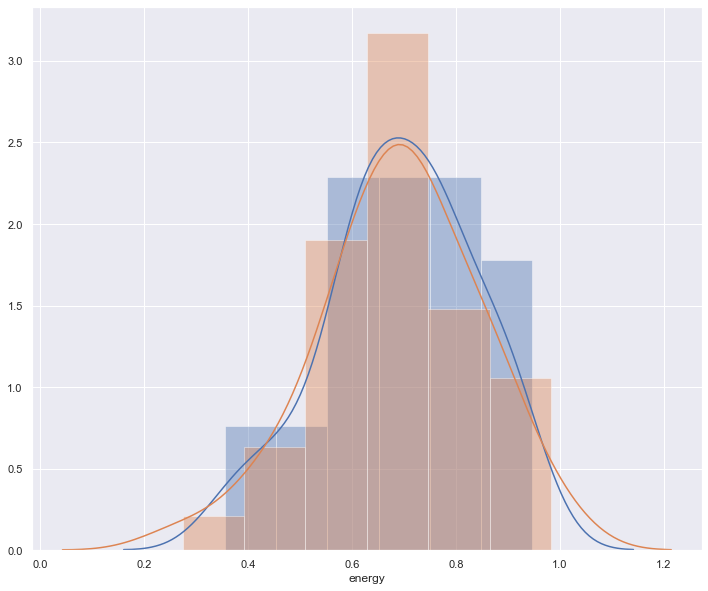

In [158]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
ax = sns.distplot(sample_1984)
ax2 = sns.distplot(sample_2009)

In [161]:
from scipy.stats import ttest_ind

tracks1984 = tracks_df[tracks_df['year']==1984]
tracks2009 = tracks_df[tracks_df['year']==2009]

sample_1984 = tracks1984['danceability'].sample(n=40, random_state=5)
sample_2009 = tracks2009['danceability'].sample(n=40, random_state=3)

sample_1984_mean = np.mean(sample_1984)
sample_2009_mean = np.mean(sample_2009)
print("1984 mean value:",sample_1984_mean)
print("2009 mean value:",sample_2009_mean)
sample_1984_std = np.std(sample_1984)
sample_2009_std = np.std(sample_2009)
print("1984 std value:",sample_1984_std)
print("2009 std value:",sample_2009_std)
twosample_results = ttest_ind(sample_1984,sample_2009)
print("p-value",twosample_results[1])
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

1984 mean value: 0.6554499999999999
2009 mean value: 0.6512500000000001
1984 std value: 0.1489268192771201
2009 std value: 0.1395578285156372
p-value 0.8980742822714485
we accept null hypothesis


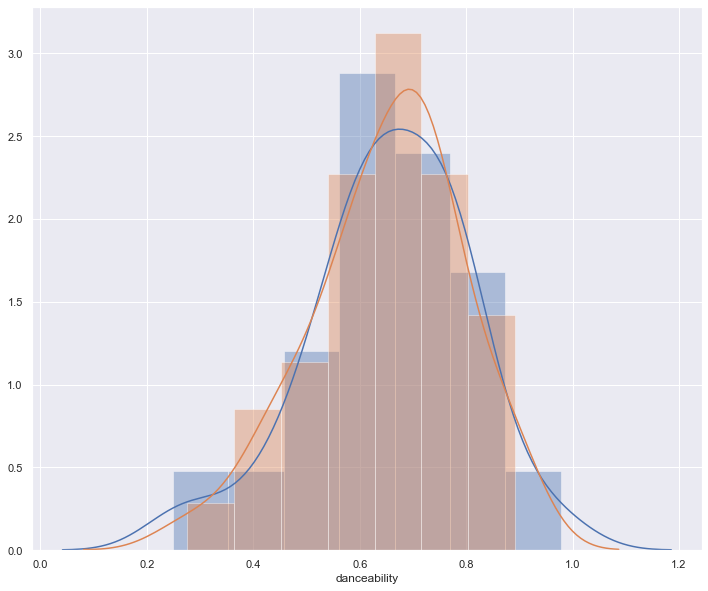

In [160]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
ax = sns.distplot(sample_1984)
ax2 = sns.distplot(sample_2009)

In [ ]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly import FigureFactory as FF


matrix_twosample = [
    ['', 'Test Statistic', 'p-value'],
    ['Sample Data', twosample_results[0], twosample_results[1]]
]

twosample_table = FF.create_table(matrix_twosample, index=True)
py.iplot(twosample_table, filename='twosample-table') 


In [166]:
from scipy import stats

In [167]:
stats.shapiro(sample_2009)

(0.9717351198196411, 0.40775975584983826)

In [168]:
stats.shapiro(sample_1984)

(0.9759405255317688, 0.5420865416526794)

In [172]:
stats.ttest_ind(sample_1984, sample_2009, equal_var = False)

Ttest_indResult(statistic=0.12851238245559363, pvalue=0.8980756725326929)

Welch-Satterthwaite Degrees of Freedom= 77.6730


In [175]:
def welch_ttest(x, y): 
    ## Welch-Satterthwaite Degrees of Freedom ##
    dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
   
    t, p = stats.ttest_ind(x, y, equal_var = False)
    
    print("\n",
          f"Welch's t-test= {t:.4f}", "\n",
          f"p-value = {p:.4f}", "\n",
          f"Welch-Satterthwaite Degrees of Freedom= {dof:.4f}")

welch_ttest(sample_1984, sample_2009)


 Welch's t-test= 0.1285 
 p-value = 0.8981 
 Welch-Satterthwaite Degrees of Freedom= 77.6730


In [197]:
# sample_1984 = sample_1984.to_frame()

sample_2009 = sample_2009.to_frame()
sample_2009['year']='2009'
# sample_1984['year']="1984"
# sample_1984.head()
# type(sample_1984)

In [200]:
sample = pd.concat([sample_1984, sample_2009])
sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82 entries, 1514 to year
Data columns (total 2 columns):
danceability    82 non-null float64
year            82 non-null object
dtypes: float64(1), object(1)
memory usage: 1.9+ KB


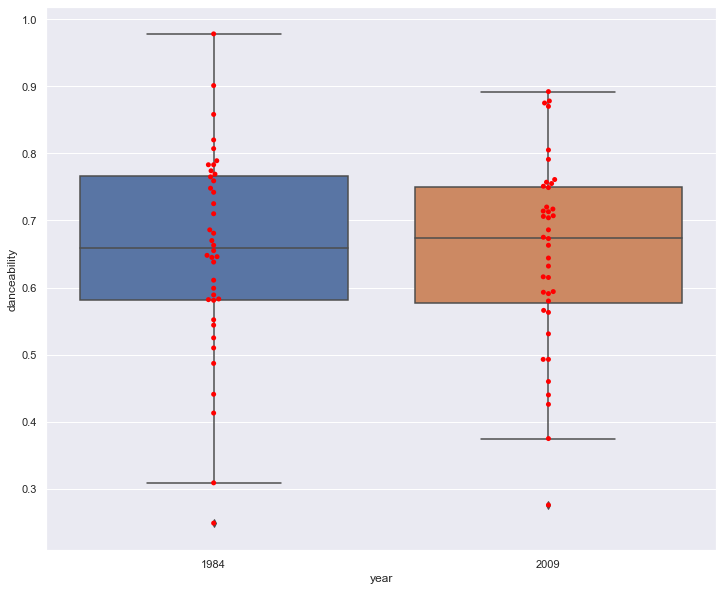

In [213]:

# boxplot
ax = sns.boxplot(x=sample['year'], y=sample['danceability'])
 
# Add jitter with the swarmplot function.
ax = sns.swarmplot(x=sample['year'], y=sample['danceability'], color="red")


In [207]:
sample[sample['danceability']==2009]

,danceability,year
year,2009.0,2009


In [209]:
sample.drop(sample.tail(1).index,inplace=True)

Text(0.5, 1.0, 'Figure P1\n Bar Plot')

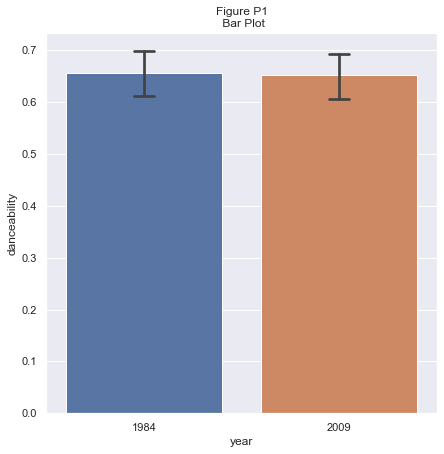

In [214]:
f, ax = plt.subplots(figsize=(7, 7))

sns.barplot(x = "year", y = "danceability", data = sample, capsize= .1)
plt.title("Figure P1\n Bar Plot")



Text(0.5, 1.0, 'Figure P2\n Basic Rainclouds')

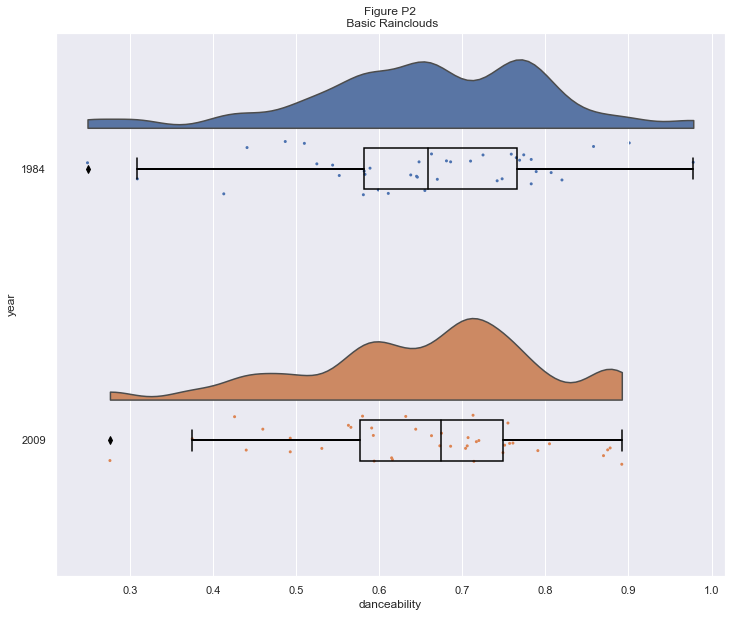

In [225]:
import matplotlib.collections as clt
import ptitprince as pt
f, ax = plt.subplots(figsize=(12, 10))

pal = 'Set2'
dy="year"; dx="danceability"; ort="h"; pal = sns.color_palette(n_colors=2)

ax=pt.half_violinplot( x = dx, y = dy, data = sample, palette = pal, bw = .2, cut = 0.,
                      scale = "area", width = .6, inner = None, orient = ort)

ax=sns.stripplot( x = dx, y = dy, data = sample, palette = pal, edgecolor = "white",
                 size = 3, jitter = 1, zorder = 0, orient = ort)

ax=sns.boxplot( x = dx, y = dy, data = sample, color = "black", width = .15, zorder = 10,\
            showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
            showfliers=True, whiskerprops = {'linewidth':2, "zorder":10},\
               saturation = 1, orient = ort)

plt.title("Figure P2\n Basic Rainclouds")

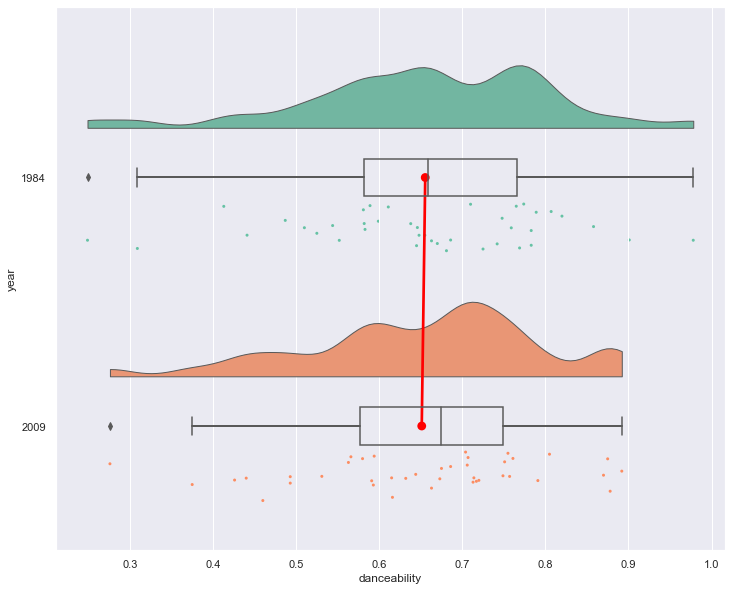

In [230]:
dx = "year"; dy = "danceability"; ort = "h"; pal = "Set2"; sigma = .2
f, ax = plt.subplots(figsize=(12, 10))

pt.RainCloud(x = dx, y = dy, data = sample, palette = pal, bw = sigma,
                 width_viol = .6, ax = ax, orient = ort, move = 0.2, pointplot = True)

In [231]:
tracks_2018=pd.read_csv('final2018.csv')

In [234]:
tracks_2018['year']='2018'

In [236]:
tracks_2014=pd.read_csv('final2014.csv')

In [238]:
tracks_2014['year']='2014'

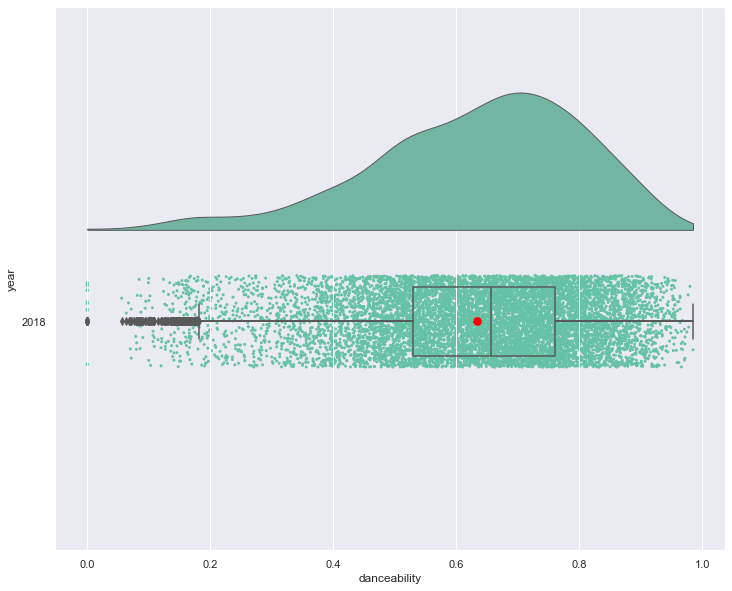

In [242]:
dx = "year"; dy = "danceability"; ort = "h"; pal = "Set2"; sigma = .2
f, ax = plt.subplots(figsize=(12, 10))

pt.RainCloud(x = dx, y = dy, data = tracks_2018, palette = pal, bw = sigma,
                 width_viol = .6, ax = ax, orient = ort, move = 0, pointplot = True)

In [241]:
def welch_ttest(x, y): 
    ## Welch-Satterthwaite Degrees of Freedom ##
    dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
   
    t, p = stats.ttest_ind(x, y, equal_var = False)
    
    print("\n",
          f"Welch's t-test= {t:.4f}", "\n",
          f"p-value = {p:.4f}", "\n",
          f"Welch-Satterthwaite Degrees of Freedom= {dof:.4f}")

welch_ttest(tracks_2014['danceability'],tracks_2018['danceability'])


 Welch's t-test= -26.5863 
 p-value = 0.0000 
 Welch-Satterthwaite Degrees of Freedom= 19212.3689


In [245]:
dance_2014=tracks_2014[['danceability', 'year']].copy()

In [246]:
dance_2014.head()

,danceability,year
0,0.696,2014
1,0.484,2014
2,0.566,2014
3,0.504,2014
4,0.418,2014


In [247]:
dance_2018=tracks_2018[['danceability', 'year']].copy()

In [249]:
dance = pd.concat([dance_2014, dance_2018])

In [250]:
dance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19215 entries, 0 to 9681
Data columns (total 2 columns):
danceability    19215 non-null float64
year            19215 non-null object
dtypes: float64(1), object(1)
memory usage: 450.4+ KB


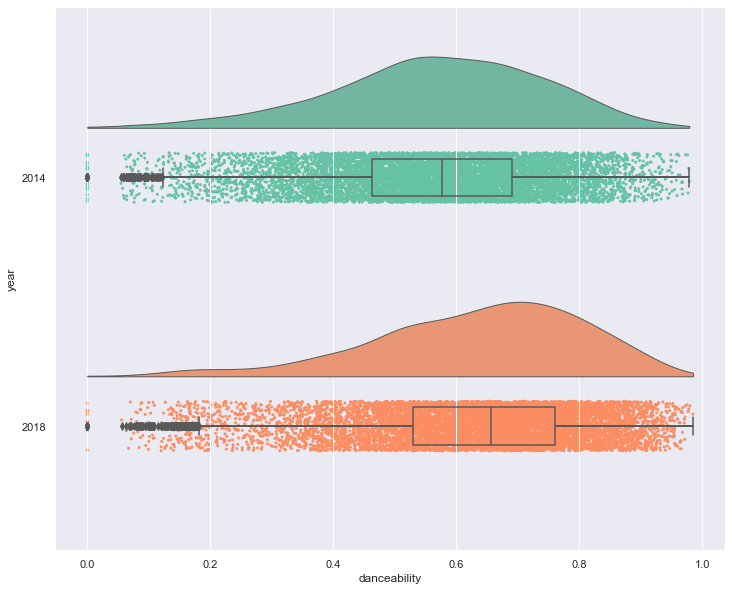

In [252]:
dx = "year"; dy = "danceability"; ort = "h"; pal = "Set2"; sigma = .2
f, ax = plt.subplots(figsize=(12, 10))

pt.RainCloud(x = dx, y = dy, data = dance, palette = pal, bw = sigma,
                 width_viol = .6, ax = ax, orient = ort, move = 0)

In [270]:
sample_d2014 = dance_2014.sample(n=1000, random_state=4)

In [269]:
sample_d2018 = dance_2018.sample(n=1000, random_state=4)

In [271]:
sample_d = pd.concat([sample_d2014,sample_d2018])

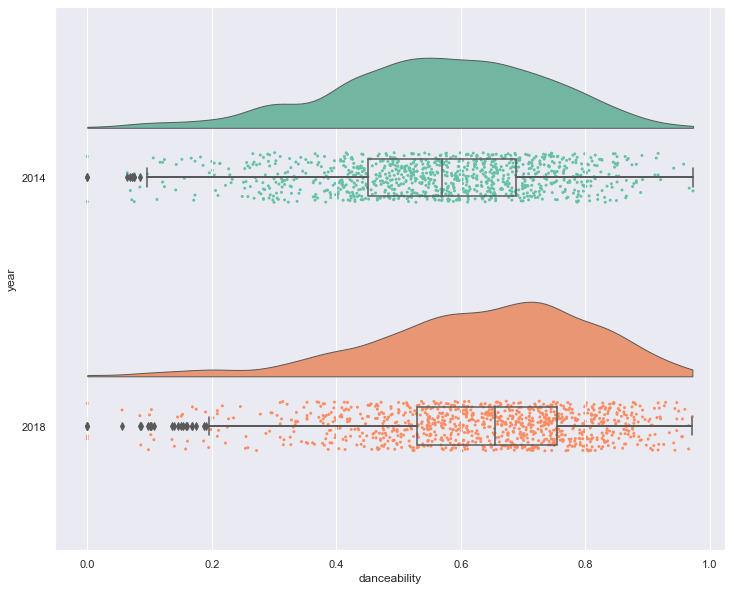

In [272]:
dx = "year"; dy = "danceability"; ort = "h"; pal = "Set2"; sigma = .2
f, ax = plt.subplots(figsize=(12, 10))

pt.RainCloud(x = dx, y = dy, data = sample_d, palette = pal, bw = sigma,
                 width_viol = .6, ax = ax, orient = ort, move = 0)

In [276]:
zero = tracks_2014[tracks_2014['danceability']<0.01]

In [281]:
twenty= tracks_2014[(tracks_2014['danceability']>0.1) &(tracks_2014['danceability']<0.2)]
twenty

,Unnamed: 0,artist_name,release_date,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,year
175,175,Bush,2014-10-14,Machinehead,6dJODklApmve5IzgKWUqV2,64,0.000026,0.143,256333,0.91900,0.00427,9,0.1340,-4.438,1,0.1100,172.668,3,0.2010,2014
404,404,Lana Del Rey,2014-01-01,Ultraviolence,1y3r6RXiJZNBV1EI0NggpS,66,0.278000,0.144,251480,0.54100,0.00001,0,0.1010,-7.076,1,0.0380,79.262,3,0.0899,2014
443,443,Hans Zimmer,2014-11-18,Cornfield Chase,3PrLXpTfUdi9iE1PA82sS3,68,0.951000,0.168,126960,0.22600,0.98300,9,0.0998,-16.457,0,0.0418,94.103,4,0.0477,2014
606,606,Nature Sounds,2014-12-01,Zen Rain,16ywLRocAvXYSDga4D4yxm,60,0.138000,0.161,116387,0.50300,0.86900,1,0.2110,-25.249,1,0.0448,84.902,4,0.0363,2014
651,651,Deep Inside,2014-03-04,A Glowing Heart,2SZJl7ZigkaEGhLA270KtT,62,0.990000,0.143,119615,0.00155,0.92100,0,0.1000,-34.708,1,0.0428,139.516,3,0.0393,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9425,9425,French 79,2014-10-22,Between the Buttons,4X6wlKIW5Zs0q9FuT9bCWp,52,0.171000,0.160,317106,0.38600,0.68000,5,0.0974,-12.019,0,0.0361,90.379,4,0.0348,2014
9447,9447,Porya Hatami,2014-03-22,Kani (Day),5h5CZG6DA94wk4lkf0a3bc,40,0.970000,0.154,537611,0.10400,0.93100,5,0.0922,-20.406,1,0.0424,69.550,4,0.0337,2014
9493,9493,Official Pet Care Collection,2014-01-28,Canine Relaxation: Top Music for Your Precious...,2jJMiH3W5PsoLnm9nCer05,39,0.960000,0.141,396520,0.21800,0.88100,5,0.7500,-17.879,1,0.0428,75.047,4,0.0325,2014
9496,9496,Bethel Music,2014-04-21,Joy of the Lord (Live) [Spontaneous],4I5mQTJaiClBznJszVy57M,39,0.133000,0.154,400533,0.57700,0.09810,9,0.0739,-8.780,1,0.0398,154.379,4,0.0536,2014
